{% include toc title="On This Page" icon="file-text" %}

<div class="notice--success alert alert-info" markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

At the end of this activity, you will be able to:

* Define the structure of tabular data.
* Describe the difference between the two common types of tabular text file formats: `txt` and `csv` files.
* Be able to list some commonly used scientific data types that often are downloaded in a tabular format. 

</div>

## What is Tabular Data?

Tabular data are data that are stored in a row / column format. Columns (and 
sometimes rows) are often identified by headers, which if named correctly, explain
what is in that row or column. You may already be 
familiar with spreadsheet tools such as Excel and Google Sheets that can be 
used to open tabular data. 


## Tabular Data Structure
In the example below, you see a table of values 
that represent precipitation for 3 days. The headers in the data include 

* `day` and
* `precipitation-mm`


| day   | precipitation-mm    |  
|:----------|:-------------|
| monday | 0 | 
| tuesday | 1   | 
| wednesday | 5 | 

The tabular data above contains 4 rows - the first of which (row 1) is a header row and subsequent rows contain data. The table also has 2 columns. 


## Common Tabular Data File Types: .csv and .txt

Tabular data can be downloaded in many different file formats. Spreadsheet formats 
include `.xls` and `xlsx` which can be directly opened in Microsoft 
Excel. When you are downloading Earth and Environmental data, you will often 
see tablular data stored in file formats including: 

* `.csv`: Comma Separated Values - This file has each column separated (delimited) by a comma. 
* `.txt`: A basic text file. In a `txt` file, often the delimiter (the thing that separates out each column) can vary. Delimiters are discussed below in more detail. 

These formats are text based and often can be opened in a text editor like Atom or Notepad. 
They can be then imported into **Python** using **Pandas** for further exploration 
and processing. 


<div class="notice--success alert alert-info" markdown="1">

<i class="fa fa-star"></i> **Data Tip:** The challenge with graphical user 
interface (GUI) based tools like Excel
is that they often have limitations when it comes to working with larger files. 
Further, it becomes difficult to recreate workflows implemented in Excel because
you are often pressing buttons rather than scripting workflows. You can use 
Open Source Python to implement any workflow you might implement in Excel 
and that workflow can become fully sharable and reproducible! 
</div>

## Text Files & Delimiters

A delimiter refers to the character that defines the boundary for different sets of information. 
In a text file, the delimiter defines the boundary between columns. A line break (a return) defines 
each row. 

Below you will find an example of a comma delimited text file. In the example below, each column of data 
is separated by a comma `,`. The data also include a header row which is also separated by commas.

```
site_code, year, month, day, hour, minute, second, time_decimal, value, value_std_dev  
BRW,1973,1,1,0,0,0,1973.0,-999.99,-99.99
BRW,1973,2,1,0,0,0,1973.0849315068492,-999.99,-99.99 
BRW,1973,3,1,0,0,0,1973.1616438356164,-999.99,-99.99 
```

Here is an example of a space delimited text file. In the example below, each column of data 
are separated by a single space. 

```
site_code year month day hour minute second time_decimal value value_std_dev  
BRW 1973 1 1 0 0 0 1973.0 -999.99 -99.99
BRW 1973 2 1 0 0 0 1973.0849315068492 -999.99 -99.99 
BRW 1973 3 1 0 0 0 1973.1616438356164 -999.99 -99.99 
```

There are many different types of delimiters including:

* tabs
* commas
* 1 (or more) spaces

Sometimes you will find other characters used as delimiters but the above-listed options are the most common. 

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** The `.csv` file format is most often delimited by a comma. Hence the name: 
</div>



## Earth and Environmental Data That Are Stored In Text File Format

There are many different types of data that are stored in text and tabular file formats.
Below you will see a few different examples of data that are provided in this format. You
will also explore some of the cleanup steps that you need to import and begin to work with 
the data. 


<div class="notice--success alert alert-info" markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Not all text files store tabular text (character) based data. The `.asc` file format is a text based format that stores spatial raster data.  
</div>

In [1]:
# Import packages
import os

import matplotlib.pyplot as plt
import pandas as pd

If you have a url that links directly to a file online, you can 
open it using pandas `.read_csv()`. Have a look at the data below - 
and notice that is has:

* 3 columns: months, precip and seasons
* 12 rows: notice that the first row is numered as `0`. This is because indexing 
in Python always starts at 0 rather than 1. 


<div class="notice--success alert alert-info" markdown="1">

<i class="fa fa-star"></i> **Data Tip:** You can learn more about zero-based indexing in the <a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/python-code-fundamentals/get-started-using-python/lists/#list-index-in-python" target = "_link" >chapter on lists in this textbook </a>  

</div>

In [2]:
# Download and open the .csv file using Pandas
avg_monthly_precip = pd.read_csv(
    "https://ndownloader.figshare.com/files/12710618")

# View the data that you just downloaded and opened
avg_monthly_precip

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


In **Pandas**, this table format is referred to as a `dataframe`. 
You can view some stats about the `dataframe` including the number of columns 
and rows in the data using `.info()`.

In [3]:
avg_monthly_precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   months   12 non-null     object 
 1   precip   12 non-null     float64
 2   seasons  12 non-null     object 
dtypes: float64(1), object(2)
memory usage: 416.0+ bytes


Finally, you can easily plot the data using `.plot()`.

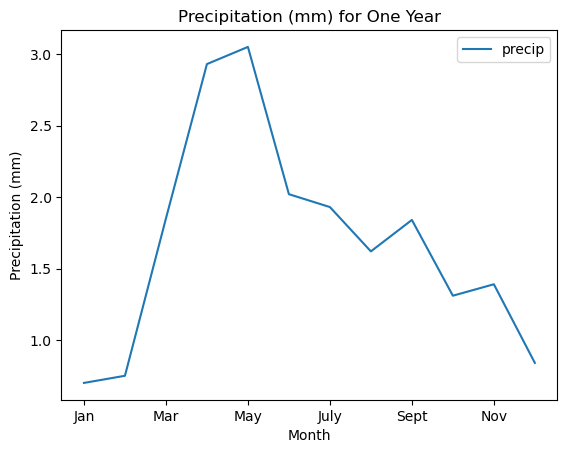

In [4]:
# Plot the data
f, ax = plt.subplots()
avg_monthly_precip.plot(x="months",
                        y="precip",
                        title="Precipitation (mm) for One Year",
                        ax=ax)
ax.set(xlabel='Month',
       ylabel='Precipitation (mm)')
plt.show()

<div class="notice--warning alert alert-info" markdown="1">


## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 1

* Use Python to determine the `type` of data stored in `avg_monthly_precip`

HINT: you learned how to determine the type of an object in the variables lessons last week. 

</div>

In [5]:
# Check the type of the variable avg_monthly_precip in this cell
type(avg_monthly_precip)

pandas.core.frame.DataFrame

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 2

In most programming languages, you can customize the options for how a function 
runs by using parameters. Examples of parameters in the plot above include: 

* `x="months"` - tell python which data to place on the x-axis
* `y="precip"` - tell python which data to place on the y-axis

Above you created a line plot. You can use the `kind=""` parameter to 
modify the type of plot that pandas created. You can use the `color=""` 
parameter to specify a color that you wish to use for each bar in the plot. 

Do the following:

1. copy the code below.
2. Add `kind="bar"` to the `.plot()` method. 
3. Specify the color of each bar using the `color=""` parameter. 

Run your code and see what the final plot looks like. You can select 
any color that you wish to complete your plot. 

Use this link to find a list of colors (open it in a new browser tab!) https://het.as.utexas.edu/HET/Software/Matplotlib/api/colors_api.html


```python
f, ax = plt.subplots()
avg_monthly_precip.plot(x="months",
                        y="precip",
                        title="Precipitation (mm) for One Year",
                        ax=ax)
ax.set(xlabel='Month',
       ylabel='Precipitation (mm)')
plt.show()
```

The plot below is an example of what your final plot should look like. 
</div>

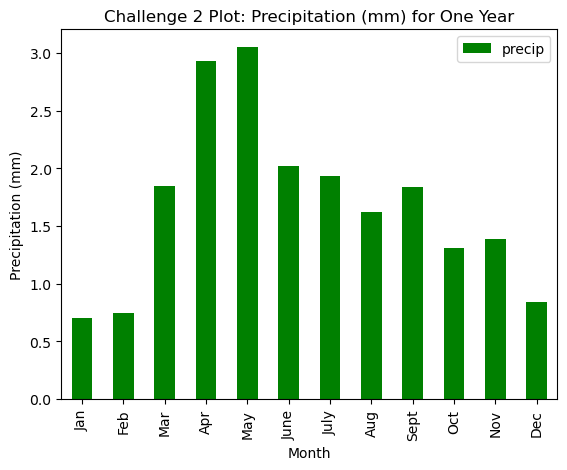

In [6]:
# Modify the plot code above in this cell - to create a bar plot using kind=
# Change the color of the bars using color=
f, ax = plt.subplots()
avg_monthly_precip.plot(kind="bar",
                        color="green",
                        x="months",
                        y="precip",
                        title="Challenge 2 Plot: Precipitation (mm) for One Year",
                        ax=ax)
ax.set(xlabel='Month',
       ylabel='Precipitation (mm)')
plt.show()

## Cleaning Tabular Text Files So You Can Open Them in Python

### Missing Data Values & Headers in Text Files

Not all text files are as simple as the example above. Many text files have 
several lines of header text above the data that provide you with useful information
about the data itself. This data is referred to as metadata. 

Also, often times, there are data missing from the data that were collected. 
These missing values will be identified using a specific value that is hopefully
documented in the metadata for that file. 

Next you will explore some temperature data that need to be cleaned up. 


<div class="notice--success alert alert-info" markdown="1">

<i class="fa fa-star"></i> **Data Tip:** You can visit <a href="https://www.ncdc.noaa.gov/cag/city/time-series/" target = "_link" >the NOAA NCDC website to learn more about the data you are 
using below.</a>  
    
* Miami, Florida CSV: https://www.ncdc.noaa.gov/cag/city/time-series/USW00012839-tmax-12-12-1895-2020.csv 
* Seattle, Washington CSV: https://www.ncdc.noaa.gov/cag/city/time-series/USW00013895-tmax-1-5-1895-2020.csv 

</div>

In [7]:
# Open temperature data for Miami, Florida
miami_temp_url = "https://www.ncdc.noaa.gov/cag/city/time-series/USW00012839-tmax-12-12-1895-2020.csv"

miami_temp = pd.read_csv(miami_temp_url)
miami_temp

,Miami,Florida January-December Maximum Temperature
0,Units: Degrees Fahrenheit,NaN
1,Missing: -99,NaN
2,Date,Value
3,194812,83.4
4,194912,82.8
...,...,...
71,201612,84.6
72,201712,85.9
73,201812,84.5
74,201912,85.9


Notice that the data above contain a few extra rows of information. This 
information however is important for you to understand. 

* `Missing: -99` -- this is the value that represents the "no data" value. Misisng data might occur if a sensor stops working or a measurement isn't recorded. You will want to remove any missing data values.
* `Units: Degrees Fahrenheit` -- it's always important to first understand the units of the data before you try to interpret what the data are showing!  

Below you will use all of the information stored in the header to import your data.
You will also remove the first few rows of data because they don't actually contain any
data values. These rows contain metadata. 

### Function Parameters in Python

A parameter refers to an option that you can specify when running a function 
in **Python**. You can adjust the parameters associated with importing your data 
in the same way that you adjusted the plot type and colors above. 

Below you use: 

* `skiprows=`: to tell **Python** to skip the first 3 rows of your data
* `na_values=`: to tell **Python** to reassign any missing data values to "NA" 

NA refers to missing data. When you specify a value as NA (NaN or Not a Number 
in **Python**), it will not be included in plots or any mathematical operations.

<div class='notice--success' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** You can learn more about no data values 
in Pandas in the <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/" target = "_blank" >intermediate earth data science textbook</a>  
    
</div>

In [8]:
# Open the Miami data skipping the first 3 rows and setting no data values
miami_temp = pd.read_csv(miami_temp_url,
                         skiprows=3,
                         na_values=-99)

# View the first 5 rows of the data
miami_temp.head()

,Date,Value
0,194812,83.4
1,194912,82.8
2,195012,82.1
3,195112,82.5
4,195212,83.1


<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 3

Now that you have imported temperature data for Miami, plot the 
data using the code example above!! In your plot code, set `Date` as your 
`x-axis` value and `Value` column as your `y-axis` value.

The plot below is an example of what your final plot should look like. 
</div>

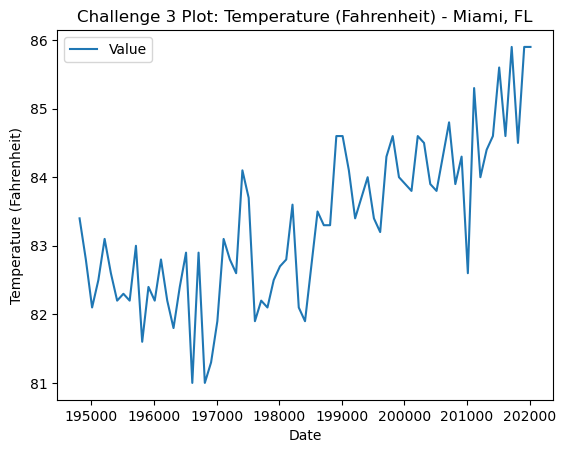

In [9]:
# Add the code needed to plot the miami_data object below
f, ax = plt.subplots()
miami_temp.plot(x="Date",
                y="Value",
                kind="line",
                title="Challenge 3 Plot: Temperature (Fahrenheit) - Miami, FL",
                ax=ax)
ax.set(xlabel='Date',
       ylabel='Temperature (Fahrenheit)')
plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 4

Use the link below to open and plot temperature data for Seattle, Washington. 

<a href="https://www.ncdc.noaa.gov/cag/city/time-series/USW00013895-tmax-1-5-1895-2020.csv" target="_blank">https://www.ncdc.noaa.gov/cag/city/time-series/USW00013895-tmax-1-5-1895-2020.csv</a>

</div>

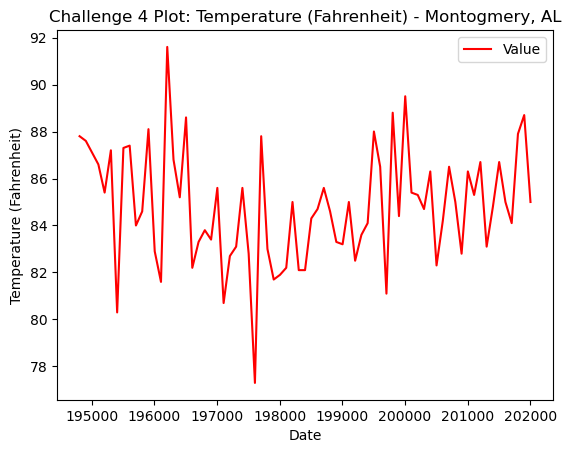

In [10]:
# Add your code to plot the data below
montgomery_temp_url = "https://www.ncdc.noaa.gov/cag/city/time-series/USW00013895-tmax-1-5-1895-2020.csv"


montgomery_temp = pd.read_csv(montgomery_temp_url)
montgomery_temp


# Open the Montgomery data skipping the first 3 rows and setting no data values
montgomery_temp = pd.read_csv(montgomery_temp_url,
                              skiprows=3,
                              na_values=-99)

# View the first 5 rows of the data
montgomery_temp.head()


f, ax = plt.subplots()
montgomery_temp.plot(x="Date",
                     kind="line",
                     y="Value",
                     title="Challenge 4 Plot: Temperature (Fahrenheit) - Montogmery, AL",
                     ax=ax,
                     color="red")
ax.set(xlabel='Date',
       ylabel='Temperature (Fahrenheit)')
plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 5 -- OPTIONAL

Copy the code below into your code. Run the code. 
It should download and open a new dataset that has CO2 emissions for a field site
in Barrow, Alaska (brw). 

The code below will download your data into your working directory. You should 
be able to open it using the filename `co2-emissions-barrow.csv`.

```python
# Download greenhouse gas CO2 data
import urllib.request

greenhouse_gas_url = "ftp://aftp.cmdl.noaa.gov/data/trace_gases/co2/in-situ/surface/brw/co2_brw_surface-insitu_1_ccgg_MonthlyData.txt"

urllib.request.urlretrieve(url=greenhouse_gas_url,
                           filename="co2-emissions-barrow.csv")

```

Once you have downloaded the data
1. Read the data in using pandas `read_csv()`
2. The data has some additional rows of information stored as metadata. You will
need to use the `skiprows=` parameter to skip those metadata rows and properly 
import the data. HINT: remember when you use `skiprows` to consider 0-based indexing.
3. Finally plot the data using pandas. plot the `"time_decimal"` column on the 
x-axis and `"value"` on the y-axis.

</div>

In [11]:
# Add your code to open and view the data here

# Download greenhouse gas CO2 data
import urllib.request

greenhouse_gas_url = "ftp://aftp.cmdl.noaa.gov/data/trace_gases/co2/in-situ/surface/brw/co2_brw_surface-insitu_1_ccgg_MonthlyData.txt"

urllib.request.urlretrieve(url=greenhouse_gas_url,
                           filename="co2-emissions-barrow.csv")

greenhouse_gas = pd.read_csv(greenhouse_gas_url,
                             skiprows=148,
                             na_values=-999.99,
                             delimiter=" ")
# greenhouse_gas.info()
# greenhouse_gas.head()
# greenhouse_gas

KeyError: 'time_decimal'

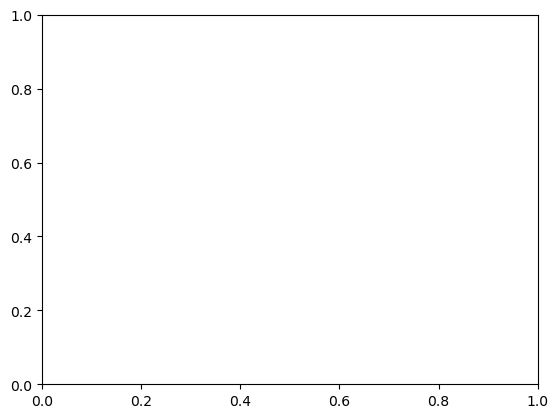

In [12]:
# make a plot of [CO2] vs. time
#  Add your code to plot the final CO2 data here
import matplotlib.pyplot as plt

f, ax = plt.subplots()
greenhouse_gas.plot(x="time_decimal",
                    y="value",
                    title="Challenge 5 Plot: CO2 - Barrow, AK",
                    ax=ax)
ax.set(xlabel='Date',
       ylabel='CO2')
plt.show()

<div class="notice--info alert alert-info" markdown="1">

## Additional Resources

* <a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/" target = "_link" >Chapter on Pandas in the Intro to Earth Data Science textbook </a> 
* <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/" target = "_link" >Chapter on Time Series with Pandas </a>  
* <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/#work-with-no-data-values-in-pandas-dataframe" target = "_link" > Textbook Section on Dealing with No Data Values in Pandas </a> 
</div>